In [ ]:
#Pre processing of data before PCA analysis: 
#input file is with columns name as ID and row names as gene ID. the genes with expression less than 10 are removed. NA removed and aggregated

#load Data
data <- read.table("/content/GSE178967_genecol_Aggregated_nzv_rounded.txt", sep="\t", header=TRUE, row.names=1, check.names=F)

In [ ]:
#Check dimensions of data
dim(data)

[1] 35587   180

In [ ]:
#Create dataframe for the table
data_t <- as.data.frame(t(data))

In [ ]:
#log transformation. 
data_logtransformed <- log(data_t+1)
#+1 so as to handle zero values

In [ ]:
dim(data_logtransformed)
#reversed of data

[1]   180 35587

In [ ]:
#Write results into a file (why)
write.table(data_logtransformed,file="/content/GSE178967_data_logtransformed.txt", sep='\t',  quote = F,row.names = TRUE)

In [ ]:
#install caret package
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
#load library
library("caret")

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
# remove near zero variation for the columns at least or 80% of the values are the same
# this function creates the filter 
#nzv <- preProcess(data_logtransformed,method="nzv",uniqueCut = 20)
#no nzv as already done in input file

In [ ]:
# apply the above created filter using "predict" function
#nzv_data <- predict(nzv,data_t)

In [ ]:
#Check dimensions of data
dim(data_logtransformed)

[1]   180 35587

In [ ]:
#Check dimensions of data
#dim(nzv_data)
#dimensions of data_log and nzv_data are same. how?

In [ ]:
# center & scaling
processCenter <- preProcess(data_logtransformed, method = c("center", "scale"))

Warning message in preProcess.default(data_logtransformed, method = c("center", :
“These variables have zero variances: AC004893.2, AC005562.2, AC006210.1, AC006366.1, AC006386.2, AC006499.8, AC007216.5, AC007620.1, AC008798.1, AC008878.2, AC009053.4, AC009060.2, AC009238.3, AC010487.4, AC010931.1, AC012005.1, AC015818.7, AC016596.2, AC017019.1, AC021146.6, AC022145.2, AC025279.3, AC026333.1, AC060814.1, AC068587.3, AC069439.1, AC073539.7, AC079150.1, AC079598.2, AC090498.1, AC090825.2, AC091304.10, AC092451.1, AC093162.1, AC096649.2, AC099489.2, AC111186.1, AC113174.1, AC116165.2, AC122133.1, AC130289.2, AC134684.11, AC136443.1, AC136944.5, AC136944.6, AC138749.4, AC138749.5, AC138869.1, AC138894.4, AC138904.2, AC138932.4, AC138969.4, AC139713.1, AC141257.4, AC174071.1, AC211486.4, AC233266.1, AC233724.7, AC242498.1, AC242852.1, AC243994.1, AC244015.1, AC244023.1, AC244098.3, AC244505.7, AC245047.3, AC245047.4, AC245128.2, AC245884.12, AF228730.1, AL133173.2, AL133217.1, AL158066.2, A

In [ ]:
# apply center & scaling
data_norm <- predict(processCenter,data_logtransformed)

In [ ]:
head(data_norm)

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_136_05,0.46538673,0.6040621,-0.03336470,0.41169375,-0.20301429,-0.8067213,-0.5695936,-0.7344587,0.7836061,0.34131940,⋯,-0.4919600,0.2364369,0.7429089,0.16509188,0.7970868,-0.3490604,0.3381461,0.2556740,-0.2901425,0.7080990
L_173_00,0.97218786,0.6040621,1.09969771,0.41169375,1.16405150,-1.6262101,0.3860856,-0.7344587,0.7836061,0.75163533,⋯,0.9056529,0.8748452,0.3846012,0.86718795,0.3068135,-0.3490604,0.3467605,0.1774184,-0.2901425,0.6102969
L_112_05,0.80417483,1.2721059,0.87492527,0.78655438,0.84176876,0.2765839,1.3065524,0.7552890,0.9648742,0.78727278,⋯,1.3058356,0.8061386,0.7721139,0.72821827,0.6512553,-0.3490604,0.9489566,0.5182524,3.3003566,0.9456596
L_282_00,0.07218837,0.1610250,0.09746043,-0.07158564,-0.06193758,0.4921376,0.8152657,-0.7344587,-0.5346740,0.08662331,⋯,-0.1516005,-0.0372776,0.2033169,-0.06082443,-0.4375099,-0.3490604,0.5435358,0.3005889,-0.2901425,0.3929139
L_133_00,0.67190629,0.1610250,0.50308182,0.94666670,0.57459680,-0.8067213,0.6141227,-0.7344587,0.5832234,0.75163533,⋯,0.5652933,0.2051492,0.6826572,0.61574696,1.1082854,-0.3490604,0.7003972,0.3582953,-0.2901425,0.7546828
L_150_00,0.55729095,0.6040621,1.34121999,0.94666670,1.41931579,-1.6262101,0.3860856,-0.7344587,0.5832234,0.88951821,⋯,-0.4919600,0.8360200,0.6117130,0.51261284,0.6512553,-0.3490604,0.4464060,-0.3921259,-0.2901425,0.8388708


In [ ]:
#round up value upto 3 digits
All_samples_PCA_input <- round(data_norm,2)

In [ ]:
head(All_samples_PCA_input)

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_136_05,0.47,0.60,-0.03,0.41,-0.20,-0.81,-0.57,-0.73,0.78,0.34,⋯,-0.49,0.24,0.74,0.17,0.80,-0.35,0.34,0.26,-0.29,0.71
L_173_00,0.97,0.60,1.10,0.41,1.16,-1.63,0.39,-0.73,0.78,0.75,⋯,0.91,0.87,0.38,0.87,0.31,-0.35,0.35,0.18,-0.29,0.61
L_112_05,0.80,1.27,0.87,0.79,0.84,0.28,1.31,0.76,0.96,0.79,⋯,1.31,0.81,0.77,0.73,0.65,-0.35,0.95,0.52,3.30,0.95
L_282_00,0.07,0.16,0.10,-0.07,-0.06,0.49,0.82,-0.73,-0.53,0.09,⋯,-0.15,-0.04,0.20,-0.06,-0.44,-0.35,0.54,0.30,-0.29,0.39
L_133_00,0.67,0.16,0.50,0.95,0.57,-0.81,0.61,-0.73,0.58,0.75,⋯,0.57,0.21,0.68,0.62,1.11,-0.35,0.70,0.36,-0.29,0.75
L_150_00,0.56,0.60,1.34,0.95,1.42,-1.63,0.39,-0.73,0.58,0.89,⋯,-0.49,0.84,0.61,0.51,0.65,-0.35,0.45,-0.39,-0.29,0.84


In [ ]:
#Write results into a file
write.table(All_samples_PCA_input,file="GSE178967_All_samples_PCA_input.txt", sep='\t',  quote = F,row.names = TRUE)

**severe00_asymptomatic00**
15 samples
1. 8 samples severe00
2. 7 samples asymptomatic00


for word in "ID" "L_001_00" "L_142_00" "L_148_00" "L_150_00" "L_313_00" "L_318_00" "L_344_00" "L_006_00" "L_118_00" "L_174_00" "L_301_00" "L_303_00" "L_311_00" "L_325_00" "L_329_00"; do grep "$word" GSE178967_All_samples_PCA_input.txt; done > PCAinput_asym_sev_day00.txt


pca

In [ ]:
#load Data
OBJECT <- read.table("/content/pcainputfinal.txt",  sep = "\t", header=TRUE, row.names = 1)

In [ ]:
head(OBJECT)
tail(OBJECT)
dim(OBJECT)

,SEVERITY,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_001_00,ASYMPTOMATIC,0.95,0.97,-0.51,0.95,-0.32,1.21,-0.19,0.21,0.96,⋯,-0.15,0.67,1.22,0.94,1.41,-0.35,0.66,0.41,-0.29,0.63
L_142_00,ASYMPTOMATIC,0.50,0.16,0.23,0.79,0.18,1.21,0.12,-0.73,0.78,⋯,-0.93,0.35,0.43,0.41,0.65,-0.35,0.45,0.44,-0.29,0.35
L_148_00,ASYMPTOMATIC,0.50,0.60,0.26,0.61,0.15,0.28,0.39,-0.73,0.78,⋯,-0.49,0.25,0.33,0.58,0.49,-0.35,0.48,0.83,-0.29,0.74
L_150_00,ASYMPTOMATIC,0.56,0.60,1.34,0.95,1.42,-1.63,0.39,-0.73,0.58,⋯,-0.49,0.84,0.61,0.51,0.65,-0.35,0.45,-0.39,-0.29,0.84
L_313_00,ASYMPTOMATIC,-0.64,-1.22,0.80,-0.38,0.53,0.28,-1.06,0.21,0.78,⋯,-0.49,0.72,0.52,-0.05,-0.61,-0.35,-0.20,0.09,-0.29,-0.34
L_318_00,ASYMPTOMATIC,-1.99,-1.22,-1.41,-1.92,-1.10,-1.63,-1.06,-0.73,-2.28,⋯,-2.61,-1.84,-2.05,-1.85,-1.62,-0.35,-1.91,-1.07,-0.29,-2.01


,SEVERITY,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_174_00,SEVERE,1.16,2.17,0.70,1.47,0.26,1.21,1.31,2.09,0.11,⋯,0.74,0.66,0.68,0.96,0.99,1.17,0.98,0.45,1.98,0.83
L_301_00,SEVERE,-2.16,-1.22,-0.90,-1.92,-1.02,-1.63,-1.06,-0.73,-2.28,⋯,-2.61,-1.58,-1.77,-2.14,-1.29,-0.35,-2.15,-2.24,-0.29,-1.86
L_303_00,SEVERE,0.03,0.16,0.67,0.41,0.51,-0.33,0.61,-0.73,-0.53,⋯,0.57,-0.04,0.32,0.03,0.31,-0.35,0.35,0.49,-0.29,0.29
L_311_00,SEVERE,-0.46,-0.41,-1.26,-0.07,-1.10,0.83,-0.57,-0.73,-0.53,⋯,-0.15,-1.21,-1.00,-0.18,-0.80,-0.35,-0.52,0.74,-0.29,-0.11
L_325_00,SEVERE,-1.59,-1.22,-2.11,-1.92,-2.81,-1.63,-1.06,0.76,-2.28,⋯,-2.61,-2.62,-2.05,-1.91,-1.29,-0.35,-1.82,-1.48,-0.29,-1.72
L_329_00,SEVERE,-1.37,-1.22,-1.41,-0.75,-2.12,-1.63,-0.57,-0.73,0.11,⋯,-0.15,0.41,0.32,-0.49,-0.61,-0.35,-0.67,-0.07,-0.29,-0.74


[1]    15 35588

In [ ]:
#install the package
install.packages("ggfortify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [ ]:
#load library
library(ggfortify)

In [ ]:
#
df <- OBJECT[2:ncol(OBJECT)]

In [ ]:
head(df)

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_001_00,0.95,0.97,-0.51,0.95,-0.32,1.21,-0.19,0.21,0.96,1.02,⋯,-0.15,0.67,1.22,0.94,1.41,-0.35,0.66,0.41,-0.29,0.63
L_142_00,0.50,0.16,0.23,0.79,0.18,1.21,0.12,-0.73,0.78,0.64,⋯,-0.93,0.35,0.43,0.41,0.65,-0.35,0.45,0.44,-0.29,0.35
L_148_00,0.50,0.60,0.26,0.61,0.15,0.28,0.39,-0.73,0.78,0.56,⋯,-0.49,0.25,0.33,0.58,0.49,-0.35,0.48,0.83,-0.29,0.74
L_150_00,0.56,0.60,1.34,0.95,1.42,-1.63,0.39,-0.73,0.58,0.89,⋯,-0.49,0.84,0.61,0.51,0.65,-0.35,0.45,-0.39,-0.29,0.84
L_313_00,-0.64,-1.22,0.80,-0.38,0.53,0.28,-1.06,0.21,0.78,-0.88,⋯,-0.49,0.72,0.52,-0.05,-0.61,-0.35,-0.20,0.09,-0.29,-0.34
L_318_00,-1.99,-1.22,-1.41,-1.92,-1.10,-1.63,-1.06,-0.73,-2.28,-2.06,⋯,-2.61,-1.84,-2.05,-1.85,-1.62,-0.35,-1.91,-1.07,-0.29,-2.01


In [ ]:
#create PCA object using built-in R functions prcomp()
pca_res <- prcomp(df)

In [ ]:
#extract variance explained by PCA componnents
var_explained <- pca_res$sdev^2/sum(pca_res$sdev^2)

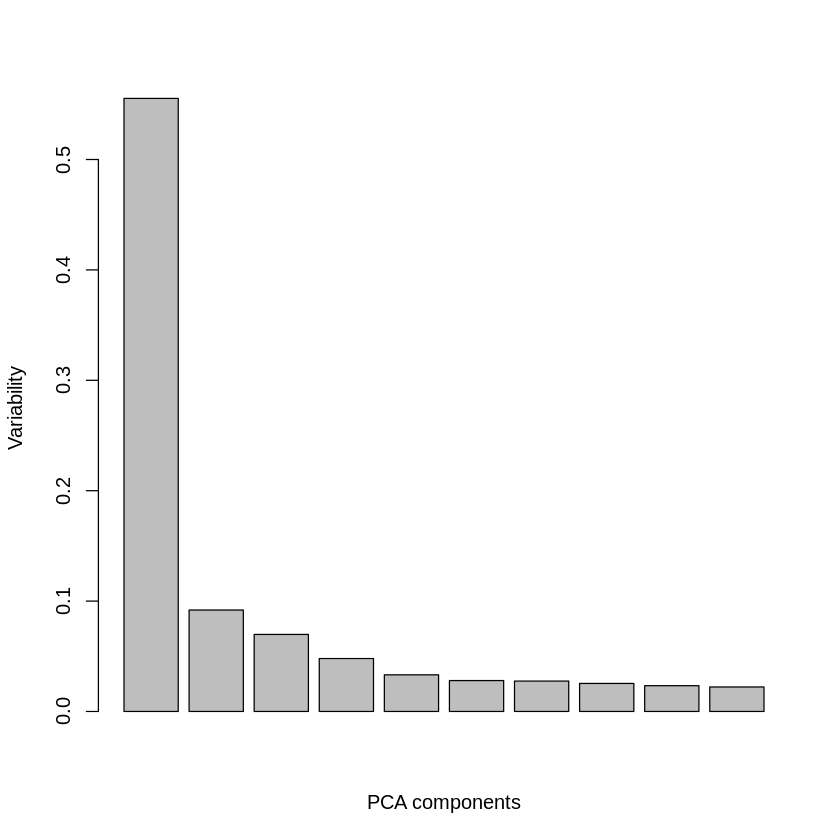

In [ ]:
#barplot for first 10 components
barplot(var_explained[1:10], xlab="PCA components", ylab="Variability")

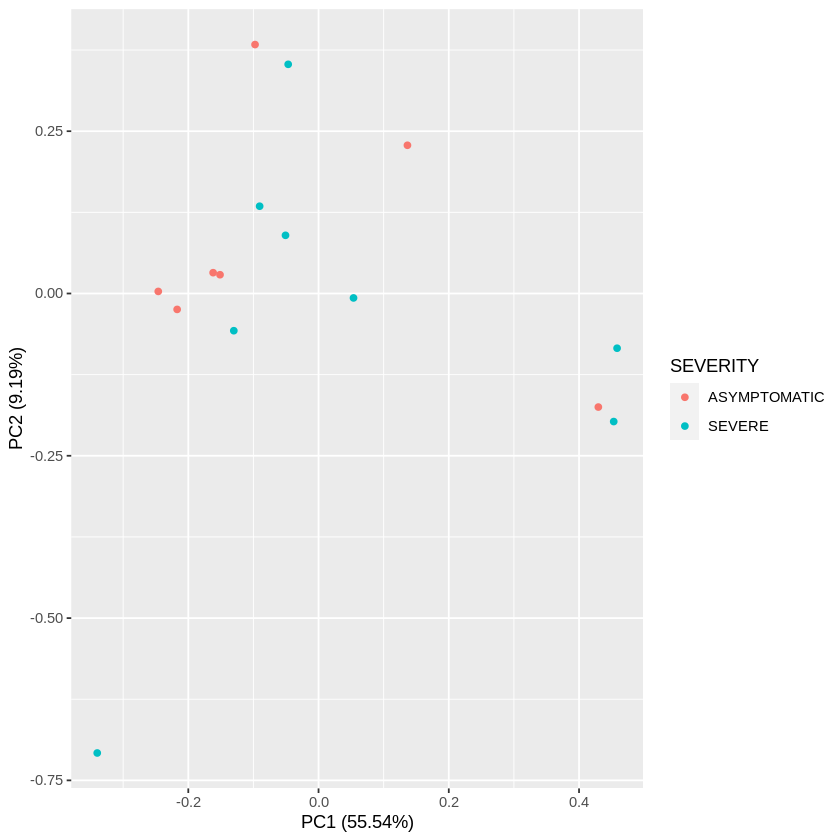

In [ ]:
#scatter plot
autoplot(pca_res, data=OBJECT, colour="SEVERITY")

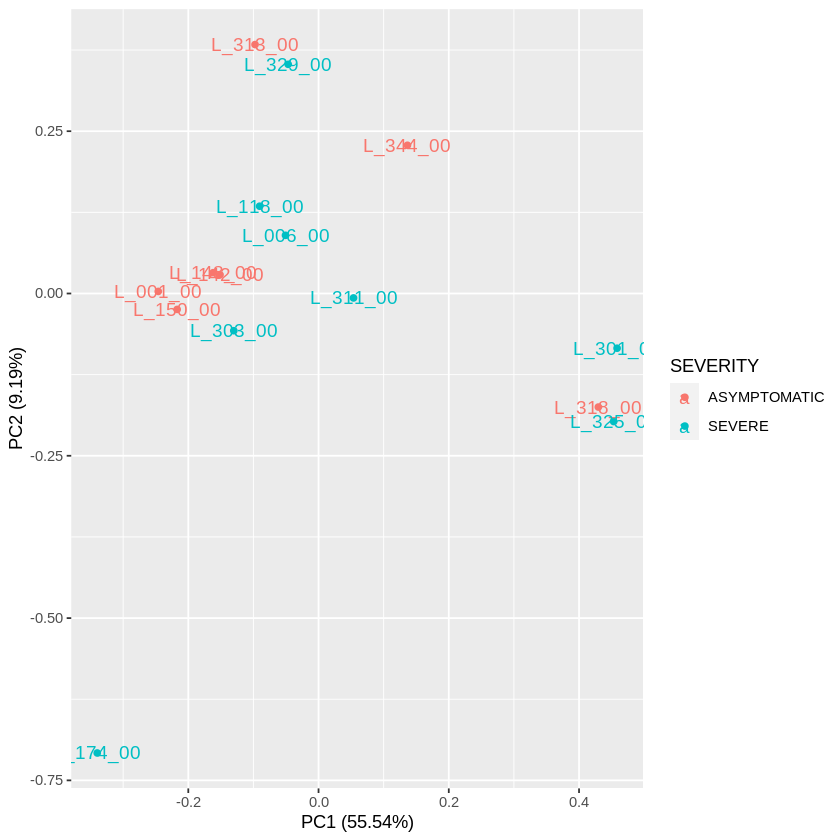

In [ ]:
#locate sampleS
autoplot(pca_res, data=OBJECT, colour="SEVERITY", label=TRUE, label.size = 4)

In [ ]:
which(rownames(OBJECT) %in% c("L_318_00", "L_174_00", "L_344_00", "L_313_00"))

[1]  5  6  7 10

In [ ]:
#drop row with row index in OBJECT and create new object with outliers removed. 
OBJECT2 <- OBJECT[-c(5,6,7,10),]

In [ ]:
dim(OBJECT)
dim(OBJECT2)

[1]    15 35588

[1]    11 35588

In [ ]:
df2 <- OBJECT2[2:ncol(OBJECT2)]

In [ ]:
dim(df2)

[1]    11 35587

In [ ]:
pca_res21_2 <- prcomp(df2)

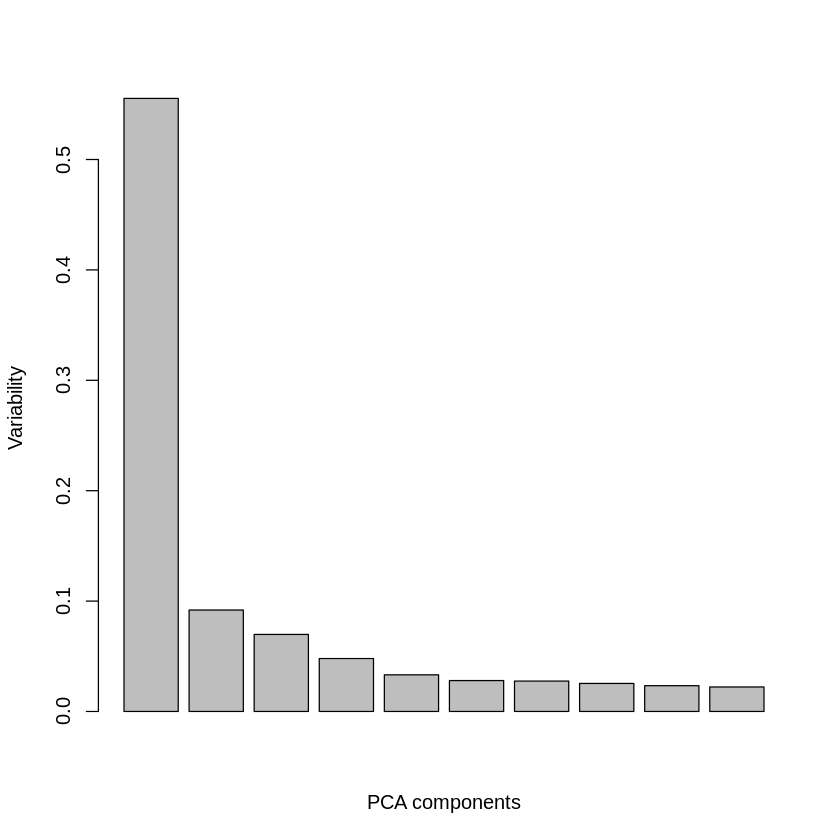

In [ ]:
#barplot for first 10 components
barplot(var_explained[1:10], xlab="PCA components", ylab="Variability")

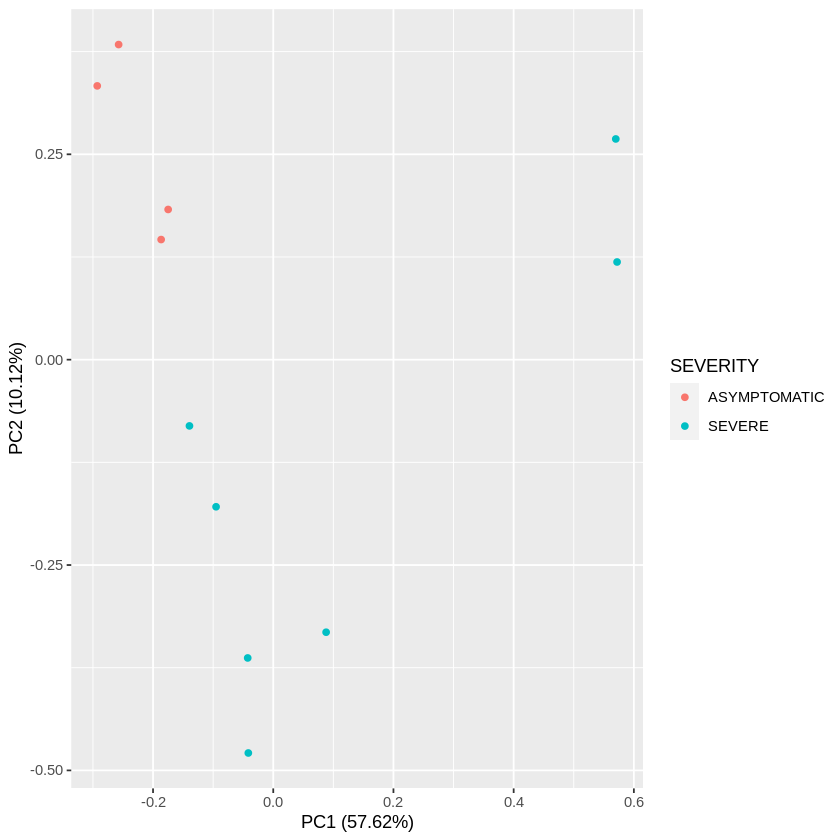

In [ ]:
autoplot(pca_res21_2, data=OBJECT2, colour="SEVERITY")

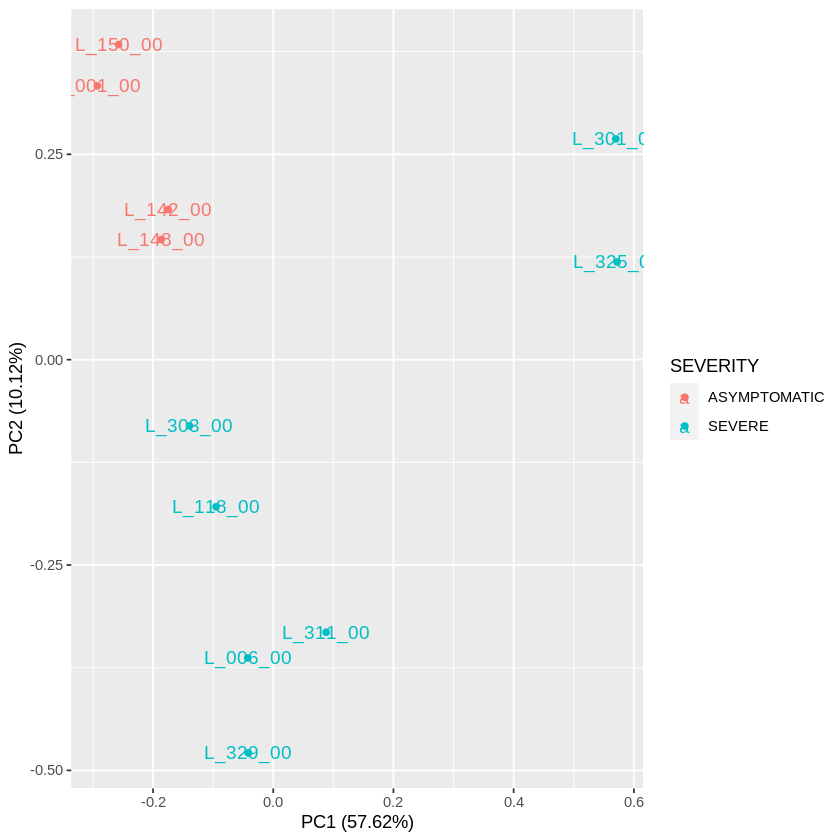

In [ ]:
autoplot(pca_res21_2, data=OBJECT2, colour="SEVERITY", label=TRUE, label.size = 4)

OUTLIERS IDENTIFIED IN PCA_2

In [ ]:
which(rownames(OBJECT) %in% c("L_318_00", "L_174_00", "L_344_00", "L_313_00", "L_301_00", "L_325_00", "L_303_00"))

[1]  5  6  7 10 11 12 14

In [ ]:
#drop row with row index in OBJECT and create new object with outliers removed. 
OBJECT3 <- OBJECT[-c(5,6,7,10,11,12,14),]

In [ ]:
dim(OBJECT)
dim(OBJECT2)
dim(OBJECT3)

[1]    15 35588

[1]    11 35588

[1]     8 35588

In [ ]:
df3 <- OBJECT3[2:ncol(OBJECT3)]

In [ ]:
dim(df3)

[1]     8 35587

In [ ]:
pca_res21_3 <- prcomp(df3)

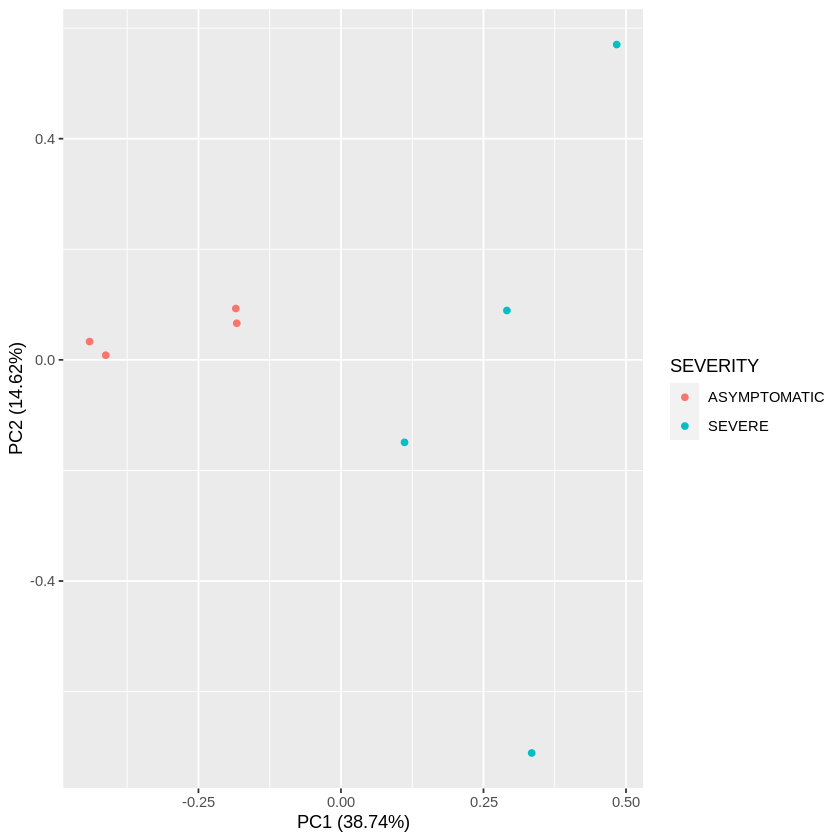

In [ ]:
autoplot(pca_res21_3, data=OBJECT3, colour="SEVERITY")

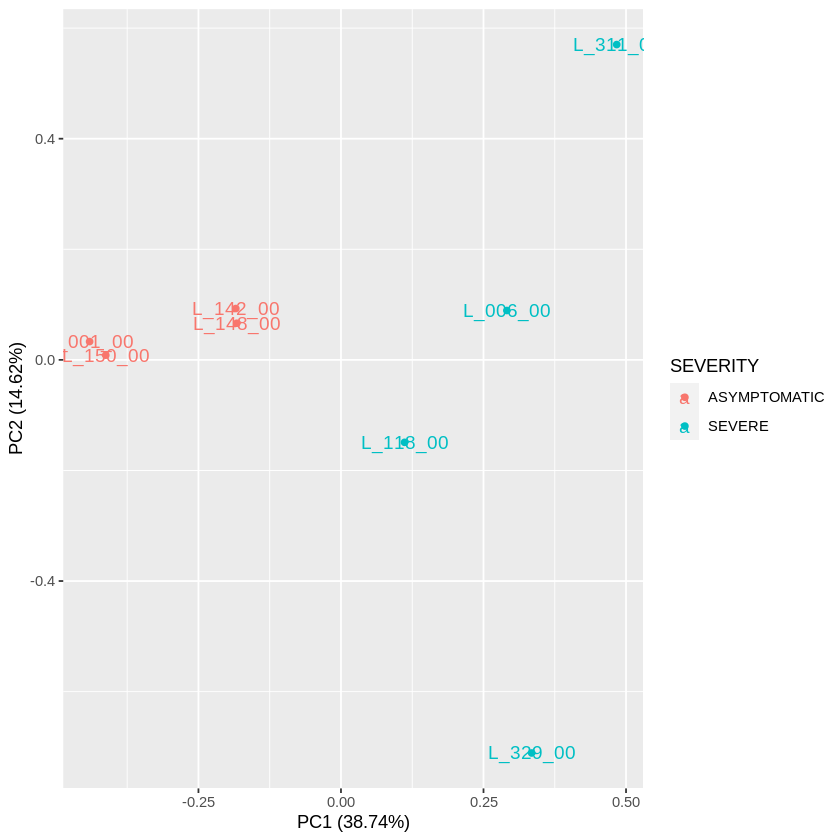

In [ ]:
autoplot(pca_res21_3, data=OBJECT3, colour="SEVERITY",  label=TRUE, label.size = 4)

22_april_2022

file: GSE178967_All_samples_PCA_input.txt + metadata in bash

**severe00_untreated_severe05_treated **
12 samples


*   8 samples severe00_untreated

*   4 samples severe05_treated 


*   for word in "ID" "L_329_00" "L_301_00" "L_325_00" "L_174_00" "L_118_00" "L_311_00" "L_006_00" "L_303_00" "L_174_05" "L_301_05" "L_303_05" "L_118_05"; do grep "$word" GSE178967_All_samples_PCA_input.txt; done > PCAinput_sev_day00_day05.txt

*   create GSE178967_PCA_INPUT_sev00_05.txt which is merge of *PCAinput_severe00_untreated_severe05_treated.txt* and *metadatafile* with the metainformation column name as *treatment*

In [ ]:
#load Data
OBJECT <- read.table("/content/GSE178967_PCA_INPUT_sev00_05.txt",  sep = "\t", header=TRUE, row.names = 1)

In [ ]:
head(OBJECT)
tail(OBJECT)
dim(OBJECT)

,treatment,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_329_00,SevereDay00,-1.37,-1.22,-1.41,-0.75,-2.12,-1.63,-0.57,-0.73,0.11,⋯,-0.15,0.41,0.32,-0.49,-0.61,-0.35,-0.67,-0.07,-0.29,-0.74
L_301_00,SevereDay00,-2.16,-1.22,-0.90,-1.92,-1.02,-1.63,-1.06,-0.73,-2.28,⋯,-2.61,-1.58,-1.77,-2.14,-1.29,-0.35,-2.15,-2.24,-0.29,-1.86
L_325_00,SevereDay00,-1.59,-1.22,-2.11,-1.92,-2.81,-1.63,-1.06,0.76,-2.28,⋯,-2.61,-2.62,-2.05,-1.91,-1.29,-0.35,-1.82,-1.48,-0.29,-1.72
L_174_00,SevereDay00,1.16,2.17,0.70,1.47,0.26,1.21,1.31,2.09,0.11,⋯,0.74,0.66,0.68,0.96,0.99,1.17,0.98,0.45,1.98,0.83
L_118_00,SevereDay00,-0.06,-0.41,0.13,-0.38,0.23,0.01,-0.57,-0.73,-0.19,⋯,-0.49,0.22,0.36,0.06,0.10,-0.35,0.08,0.43,-0.29,0.24
L_311_00,SevereDay00,-0.46,-0.41,-1.26,-0.07,-1.10,0.83,-0.57,-0.73,-0.53,⋯,-0.15,-1.21,-1.00,-0.18,-0.80,-0.35,-0.52,0.74,-0.29,-0.11


,treatment,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_006_00,SevereDay00,-0.40,-0.41,-1.53,0.19,-1.95,-0.81,0.12,-0.73,-0.53,⋯,0.13,-0.57,-0.50,-0.16,-0.28,-0.35,-0.27,0.92,-0.29,-0.03
L_303_00,SevereDay00,0.03,0.16,0.67,0.41,0.51,-0.33,0.61,-0.73,-0.53,⋯,0.57,-0.04,0.32,0.03,0.31,-0.35,0.35,0.49,-0.29,0.29
L_174_05,SevereDay05,0.56,0.16,0.30,-0.07,0.26,1.21,0.39,1.70,0.36,⋯,1.31,0.50,0.65,0.74,0.31,-0.35,0.51,0.52,-0.29,0.59
L_301_05,SevereDay05,-0.19,0.16,1.32,-0.38,1.50,0.01,-0.19,-0.73,-0.19,⋯,0.36,0.22,0.16,-0.02,-0.15,-0.35,0.05,-0.44,-0.29,-0.08
L_303_05,SevereDay05,0.07,0.16,-0.57,-0.07,-0.50,0.67,0.12,0.21,-0.53,⋯,0.91,-0.60,-0.49,-0.19,0.31,-0.35,0.20,0.74,-0.29,0.17
L_118_05,SevereDay05,0.26,0.60,-0.02,-0.07,0.12,0.97,0.39,0.21,-0.19,⋯,0.13,0.04,-0.08,0.12,0.31,-0.35,-0.11,0.66,-0.29,0.56


[1]    12 35588

In [ ]:
#install the package
install.packages("ggfortify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [ ]:
#load library
library(ggfortify)

Loading required package: ggplot2



In [ ]:
#
df <- OBJECT[2:ncol(OBJECT)]

In [ ]:
head(df)

,A1BG,A1CF,A2M,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
L_329_00,-1.37,-1.22,-1.41,-0.75,-2.12,-1.63,-0.57,-0.73,0.11,-0.99,⋯,-0.15,0.41,0.32,-0.49,-0.61,-0.35,-0.67,-0.07,-0.29,-0.74
L_301_00,-2.16,-1.22,-0.90,-1.92,-1.02,-1.63,-1.06,-0.73,-2.28,-2.06,⋯,-2.61,-1.58,-1.77,-2.14,-1.29,-0.35,-2.15,-2.24,-0.29,-1.86
L_325_00,-1.59,-1.22,-2.11,-1.92,-2.81,-1.63,-1.06,0.76,-2.28,-2.06,⋯,-2.61,-2.62,-2.05,-1.91,-1.29,-0.35,-1.82,-1.48,-0.29,-1.72
L_174_00,1.16,2.17,0.70,1.47,0.26,1.21,1.31,2.09,0.11,0.92,⋯,0.74,0.66,0.68,0.96,0.99,1.17,0.98,0.45,1.98,0.83
L_118_00,-0.06,-0.41,0.13,-0.38,0.23,0.01,-0.57,-0.73,-0.19,-0.15,⋯,-0.49,0.22,0.36,0.06,0.10,-0.35,0.08,0.43,-0.29,0.24
L_311_00,-0.46,-0.41,-1.26,-0.07,-1.10,0.83,-0.57,-0.73,-0.53,-0.88,⋯,-0.15,-1.21,-1.00,-0.18,-0.80,-0.35,-0.52,0.74,-0.29,-0.11


In [ ]:
#create PCA object using built-in R functions prcomp()
pca_res <- prcomp(df)

In [ ]:
#extract variance explained by PCA componnents
var_explained <- pca_res$sdev^2/sum(pca_res$sdev^2)

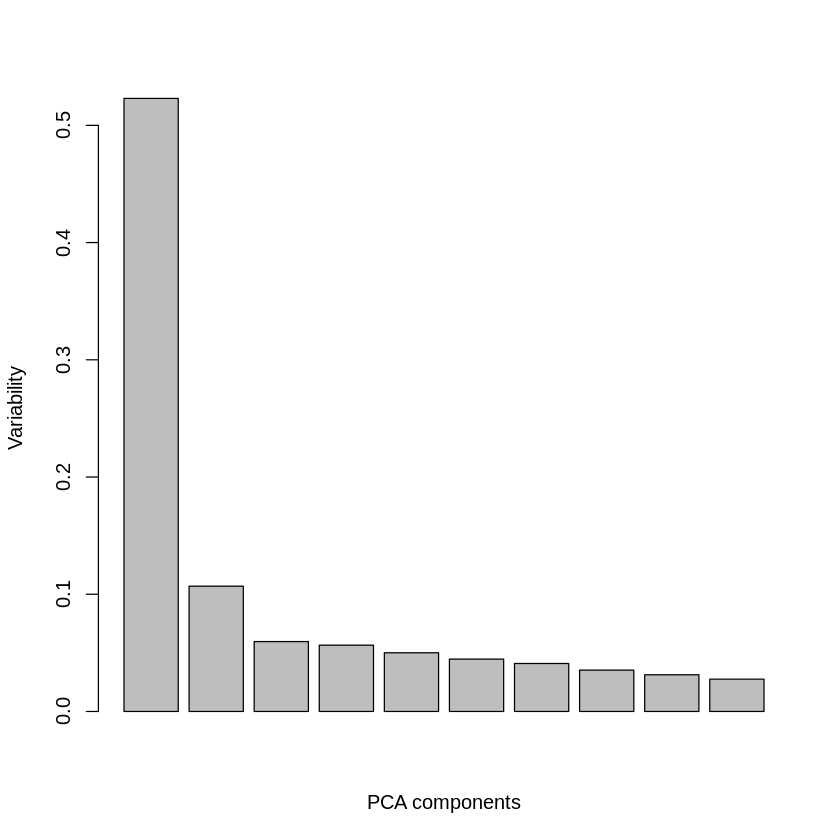

In [ ]:
#barplot for first 10 components
barplot(var_explained[1:10], xlab="PCA components", ylab="Variability")

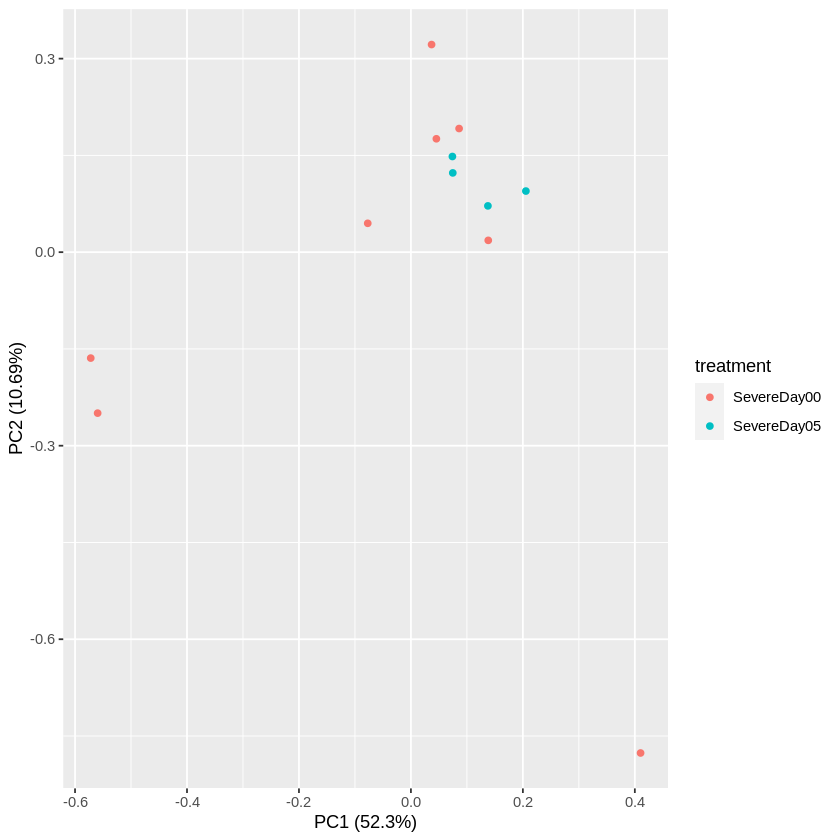

In [ ]:
#scatter plot
autoplot(pca_res, data=OBJECT, colour="treatment")

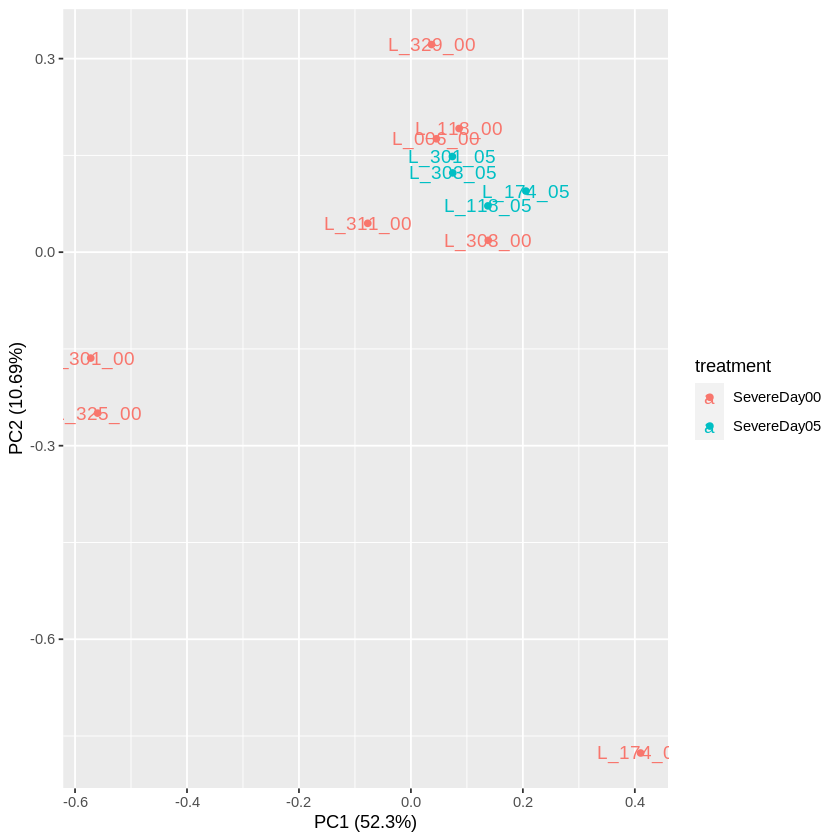

In [ ]:
#locate sampleS
autoplot(pca_res, data=OBJECT, colour="treatment", label=TRUE, label.size = 4)